In [86]:
import tensorflow as tf

In [87]:
import tensorflow.keras 
from tensorflow.keras import layers

In [88]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [89]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [90]:
train_images.shape

(60000, 28, 28)

In [91]:
#扩展维度,channel数
train_images = np.expand_dims(train_images, -1)

In [92]:
train_images.shape

(60000, 28, 28, 1)

In [93]:
model = tf.keras.Sequential()
#32为filter的个数，32个卷积核，生成32个通道，图像变成H * W * 32；
#卷积核大小3 * 3；
#输入的形状：H * W * Channel，[1:]除去第0尾的数据（因为第0尾是个数）。
model.add(tf.keras.layers.Conv2D(64, (3, 3), 
          input_shape = train_images.shape[1:], 
          #input_shape(28, 28, 1),
          #边缘填充，same与原图一样大小，valid不填充。
          padding = 'same',
          activation = 'relu'))
#增加两个Conv2D层提高拟合能力
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))
#把图像缩小，缩小到原来一半，28 * 28 → 14 * 14
model.add(tf.keras.layers.MaxPool2D())
#model.add(tf.keras.layers.Dropout(0.5))
#卷积核2倍递增
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.MaxPool2D())
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu', padding = 'same'))
#model.add(tf.keras.layers.Dropout(0.5))
#全局平均值化(None,12,12,64) → (None,64)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [94]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 256)      

In [95]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [96]:
test_images = np.expand_dims(test_images, -1)

In [97]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs = 30, 
                    validation_data = (test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 137s 2ms/sample - loss: 0.7403 - acc: 0.7201 - val_loss: 0.5095 - val_acc: 0.8208
Epoch 2/30
60000/60000 [==============================] - 121s 2ms/sample - loss: 0.4296 - acc: 0.8405 - val_loss: 0.4369 - val_acc: 0.8394
Epoch 3/30
60000/60000 [==============================] - 134s 2ms/sample - loss: 0.3673 - acc: 0.8609 - val_loss: 0.3719 - val_acc: 0.8574TA: 1s 
Epoch 4/30
60000/60000 [==============================] - 126s 2ms/sample - loss: 0.3287 - acc: 0.8755 - val_loss: 0.3326 - val_acc: 0.8748
Epoch 5/30
60000/60000 [==============================] - 122s 2ms/sample - loss: 0.3026 - acc: 0.8852 - val_loss: 0.3397 - val_acc: 0.8741
Epoch 6/30
60000/60000 [==============================] - 127s 2ms/sample - loss: 0.2835 - acc: 0.8930 - val_loss: 0.3057 - val_acc: 0.8887
Epoch 7/30
60000/60000 [==============================] - 130s 2ms/sample - loss: 0.2712 - acc: 0.8974 

In [98]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

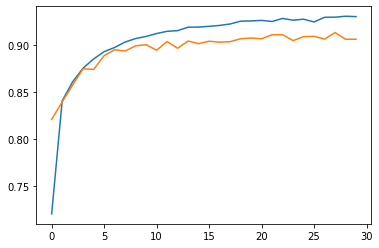

In [99]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')

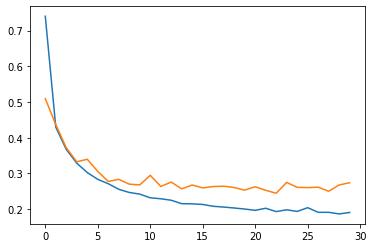

In [100]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')